[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/schlichtanders/fall-in-love-with-julia/main?filepath=08%20graphs%20-%2001%20introduction.ipynb)

<a href="https://www.jolin.io" target="_blank" rel="noreferrer noopener">
<img src="https://www.jolin.io/assets/Jolin/Jolin-Banner-Website-v1.1-darkmode.webp">
</a>

# Fall-in-love-with-Julia: Graphs in Julia with Graphs.jl

a 101 introduction session

In [ ]:
using Random; Random.seed!(2022);  # make sure this tutorial is reproducible

# Graphs.jl - Introduction

"The project goal is to mirror the functionality of robust network and graph analysis libraries such as NetworkX." (https://github.com/JuliaGraphs/Graphs.jl)

In this introductory notebook we are going to look into how to construct and inspect Graphs.

<img src="https://juliagraphs.org/Graphs.jl/dev/assets/logo.png" width="30%">

### What Graphs.jl does:
- defines Graph structure
- undirected graphs `Graph` and directeted graphs `DiGraph` 

### What Graphs.jl does not:
- stores attributes and other information - these should be stored outside of the graph itself

In [ ]:
using Graphs, GraphPlot

# add_vertices! & add_edge!

In [ ]:
G1 = Graph(1, 0) # graph with 1 vertices and 0 edges

In [ ]:
add_vertices!(G1, 2)  # be careful, add_vertices is not idempotent!
G1 # graph with 3 vertices and 0 edges

In [ ]:
# Make a line
add_edge!(G1, 1, 2)
add_edge!(G1, 1, 3)
G1 # graph with 3 vertices and 2 edges

In [ ]:
gplot(G1, nodelabel=1:3)

In [ ]:
G1[[Edge(1,3)]]

### Graph implementation details

don't use this, but still enlightening

In [ ]:
fieldnames(typeof(G1))

In [ ]:
G1.ne

In [ ]:
G1.fadjlist

### Graph properties

In [ ]:
neighbors(G1, 1)

In [ ]:
common_neighbors(G1, 2, 3)

In [ ]:
degree(G1, 1)

In [ ]:
@show ne(G1)
@show nv(G1)

gplot(G1, nodelabel=1:nv(G1), edgelabel=1:ne(G1))

In [ ]:
@show [vertices(G1)...];
@show [edges(G1)...];

In [ ]:
incidence_matrix(G1)

In [ ]:
adjacency_matrix(G1)

In [ ]:
laplacian_matrix(G1)

documentation of more properties see
- https://juliagraphs.org/Graphs.jl/dev/basicproperties/ 
- https://docs.juliahub.com/Graphs/VJ6vx/1.4.0/core/

## 💪 it is your turn: Make a triangle

transform G1 so that it becomes a triangle

In [ ]:
# ...

# Adjacency matrix & rem_vertex!

In [ ]:
A = [
    0 1 1
    1 0 1
    1 1 0
]
G2 = Graph(A)
gplot(G2, nodelabel=1:nv(G2), edgelabel=1:ne(G2))

In [ ]:
G1 == G2

In [ ]:
rem_vertex!(G2, 1)
gplot(G2, nodelabel=1:nv(G2), edgelabel=1:ne(G2))

Caution: If removing vertices, the vertex numbers are re-ordered!

If you want to link data to the graph, make sure you use `MetaGraph` from [MetaGraphs.jl](https://github.com/JuliaGraphs/MetaGraphs.jl)

# Create random graphs

In [ ]:
gplot(Graph(4, 3), nodelabel=1:4)

In [ ]:
gplot(DiGraph(4, 6), nodelabel=1:4)

In [ ]:
gplot(smallgraph("house"))

## 💪 it is your turn: Plot another smallgraph

you may want to take a look at the documentation of `smallgraph` by typing `?smallgraph`

In [ ]:
# ...

some other random plots

In [ ]:
gplot(complete_digraph(5))

In [ ]:
gplot(clique_graph(3, 4))

There are many many more **generators** for graphs. All documented at https://juliagraphs.org/Graphs.jl/dev/generators/#Graph-Generators

# Operators - a set-like interface

The current documentation of Operators seems corrupt, better take a look at a previous version: https://docs.juliahub.com/Graphs/VJ6vx/1.4.0/operators/

In [ ]:
regular = random_regular_graph(3, 2)
display(gplot(regular))

tree = binary_tree(3)
display(gplot(tree))

gplot(cartesian_product(regular, tree))

In [ ]:
gplot(blockdiag(path_graph(3), path_graph(2)))

## 💪 it is your turn: Combine blockdiag (can be seen as sum) and cartesian_product

and see how the graph adapts respectively

In [ ]:
# ...

### some other graph operators

In [ ]:
gplot(tensor_product(path_graph(3), random_regular_graph(3, 2)))

In [ ]:
gplot(complement(path_graph(5)))

And many more, like `egonet`, `induced_subgraph`, ... See https://docs.juliahub.com/Graphs/VJ6vx/1.4.0/operators/

# Reading/writing graphs

In [ ]:
saveme = erdos_renyi(5, 0.3)
gplot(saveme)

In [ ]:
savegraph("mygraph.lgz", saveme)  # z = compressed, lg=LightGraph

In [ ]:
gplot(loadgraph("mygraph.lgz"))

In [ ]:
;cat "mygraph.lgz"

### GraphIO.jl for other graph formats 

[GraphIO.jl](https://github.com/JuliaGraphs/GraphIO.jl) supports reading EdgeList, GML, Graph6, GraphML, Pajek NET, DOT and CDF files.

In [ ]:
import GraphIO  # Graph6 NET Edgelist and CDF work out of the box
import ParserCombinator  # needed in addition for DOT or GML
# import CodecZlib  # needed for LGCompressed
# import EzXML  # needed for GEXF and GraphML

In [ ]:
gml = """
graph [
    comment "This is a sample graph"
    directed 1
    id 42
    node [
        id 1
        label "node 1"
        thisIsASampleAttribute 42
    ]
    node [
        id 2
        label "node 2"
        thisIsASampleAttribute 43
    ]
    node [
        id 3
        label "node 3"
        thisIsASampleAttribute 44
    ]
    edge [
        source 1
        target 2
        label "Edge from node 1 to node 2"
    ]
    edge [
        source 2
        target 3
        label "Edge from node 2 to node 3"
    ]
    edge [
        source 3
        target 1
        label "Edge from node 3 to node 1"
    ]
]
"""

open("mygraph.gml", "w") do io
   write(io, gml)
end;

In [ ]:
gplot(loadgraph("mygraph.gml", "digraph", GraphIO.GMLFormat()))
# IMPORTANT! "digraph" because of directed graph

In [ ]:
# it is crucial that the graph is named
dot = """
digraph mygraph {
    a -> b -> c;
    b -> d;
}
"""

open("mygraph.dot", "w") do io
   write(io, dot)
end;

In [ ]:
gplot(loadgraph("mygraph.dot", "mygraph", GraphIO.DOTFormat()))

Many graph file formats have some special pecularities. In case something does not work out of the box, the best documentation available for GraphIO are the test runs.
Find them at https://github.com/JuliaGraphs/GraphIO.jl/tree/master/test

# MetaGraphs.jl

In [ ]:
using MetaGraphs

In [ ]:
g = random_regular_graph(5, 2)
mg = MetaGraph(g, 1.0)  # there is also MetaDiGraph for directed graphs

In [ ]:
gplot(mg, nodelabel=1:nv(mg))

`MetaGraph` stores additional information in an extra dictionary

The key functions are
- `set_prop!` / `set_props!`
- `get_prop` / `props`
- `rem_prop!` / `clear_props!`
- `has_prop`

In [ ]:
set_prop!(mg, :description, "This is a metagraph.")

In [ ]:
props(mg)

In [ ]:
set_prop!(mg, 2, :name, "John")
props(mg, 2)

In [ ]:
set_props!(mg, 1, Dict(:name=>"Susan", :id => 123))
props(mg, 1)

In [ ]:
set_props!(mg, 1, Dict(:other=>"Just added"))
props(mg, 1)

In [ ]:
set_props!(mg, Edge(1, 2), Dict(:mood => "yeah!"))
props(mg, Edge(2, 1))  # knows that it is undirected

In [ ]:
# alternative writing without Edge()
set_props!(mg, 1, 2, Dict(:catordog => "cat"))
props(mg, 2, 1)

### `filter_vertices` / `filter_edges`

In [ ]:
subgraph_vertices, vmap = induced_subgraph(mg, filter_vertices(mg, :name))

In [ ]:
props(subgraph_vertices, Edge(2,1))

In [ ]:
induced_subgraph(subgraph_vertices, filter_edges(subgraph_vertices, :catordog))

### MetaGraph store weights

In [ ]:
defaultweight(mg)

In [ ]:
enumerate_paths(dijkstra_shortest_paths(mg, 1), 5)

In [ ]:
set_prop!(mg, 1, 2, :weight, 5)

In [ ]:
enumerate_paths(dijkstra_shortest_paths(mg, 1), 5)

### SimpleWeightedGraphs.jl

If you only need weights and no further properties, take a look at [SimpleWeightedGraphs.jl](https://github.com/JuliaGraphs/SimpleWeightedGraphs.jl) for better performance

# Catlab.jl as a performant alternative to MetaGraph.jl

In Catlab.jl you can add meta data to your graph/database structure without loosing performance. Optimal code is created thanks to julia's generated functions.

The new datatype is called ACSets, which was presented last [JuliaCon 2021](https://www.youtube.com/watch?v=ZzTJ3Hrw2w8).

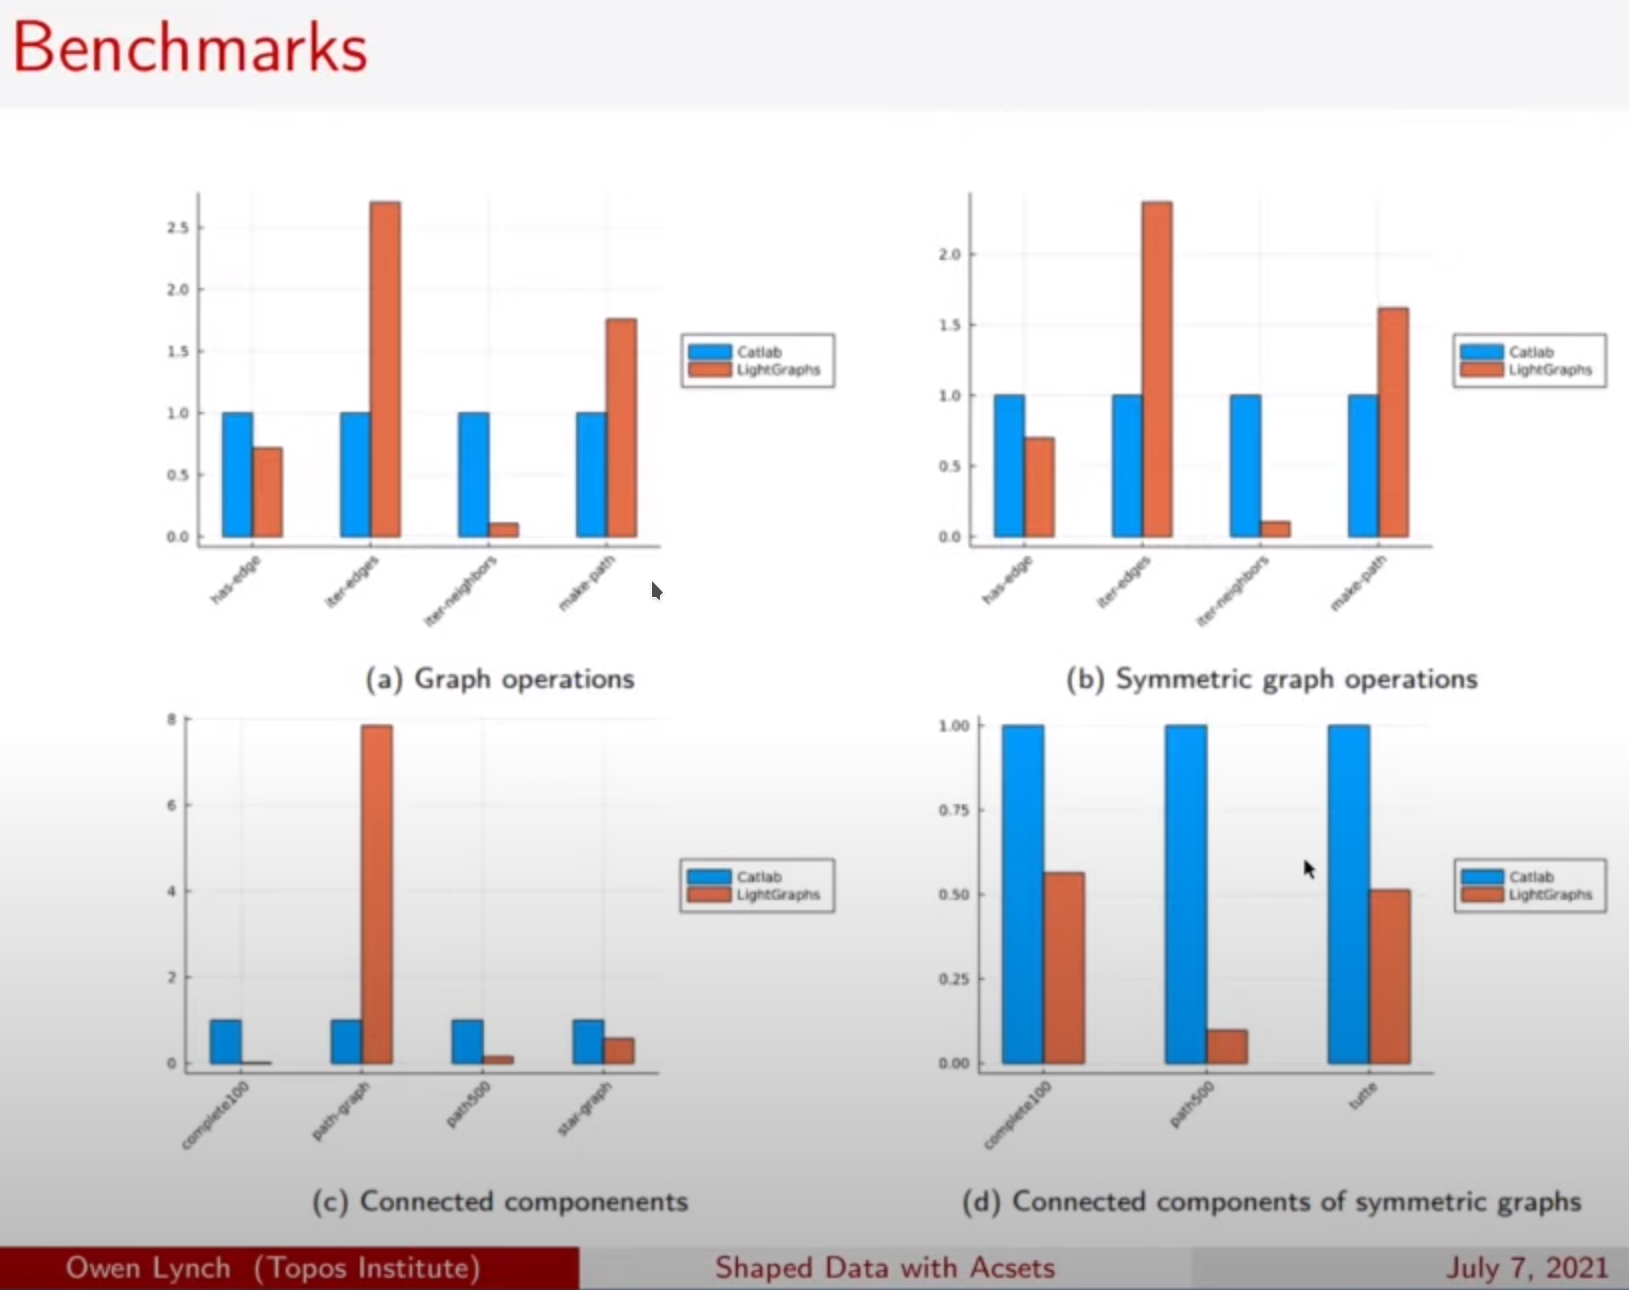

----

# Take a look at part II - Graphs.jl computations

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/schlichtanders/fall-in-love-with-julia/main?filepath=08%20graphs%20-%2002%20computation.ipynb)

# Thank you for joining

for questions or suggestions please contact me at stephan.sahm@jolin.io

<a href="https://www.jolin.io" target="_blank" rel="noreferrer noopener">
<img src="https://www.jolin.io/assets/Jolin/Jolin-Banner-Website-v1.1-darkmode.webp">
</a>